In [1]:
# Loading Libraries
import json
import glob
import os
import pandas as pd
import plotly.express as px
pd.set_option('display.max_colwidth', None)

In [2]:
data_list=[]
with open("genetracker_curations_2025_11_10.jsonl", "r") as fh:
    for line in fh.readlines():
        record = json.loads(line)
        data_list.append(record)

In [3]:
curations = pd.DataFrame(data_list)

In [20]:
curations["type"].unique() #There's no 'split' in the gold standard data and what are 'single-omim' and 'single-new'

array(['single-omim', 'lumped', 'single-new', None], dtype=object)

### Genes for POC experiment
- LUMP: RET, FHL1, SCN8A, BPTF, CAV3, CRYAB
- SPLIT : RET, FH, SCN8A, CAV3, MSH2
- Uncertain: CRYAB 

In [6]:
# Processing LLM Outputs

In [7]:
pre_curation_files = sorted(list(glob.glob("Output/*.json")))
len(pre_curation_files)

8

In [8]:
llm_precurations=[]
for pre_curation_file in pre_curation_files:
    with open(pre_curation_file) as fh:
        data = json.load(fh)
        predictions = pd.DataFrame(data['proposed_groupings'])
        predictions["gene"] = data["gene"]
        llm_precurations.append(predictions)

In [9]:
llm_precurations_df  = pd.concat(llm_precurations)

In [10]:
llm_precurations_df.reset_index(inplace=True)

In [11]:
llm_precurations_df.drop(columns={'index','group_id'}, inplace= True)

In [12]:
llm_precurations_df = llm_precurations_df.iloc[:,[-1,0,1,2,3,4,5]]

In [13]:
llm_precurations_df

,gene,entities,proposed_label,mode_of_inheritance,criteria_met,reasoning,decision
0,BPTF,"[Neurodevelopmental disorder with dysmorphic facies and distal limb anomalies, Disease-causing germline mutation(s) in BPTF-related intellectual disability-facial dysmorphism-skeletal anomalies syndrome]",Neurodevelopmental disorder with dysmorphic facies and distal limb anomalies,Autosomal dominant,"[assertions, molecular_mechanism, phenotypic_variability, mode_of_inheritance]",OMIM and Orphanet describe the same developmental syndrome due to BPTF haploinsufficiency with variable expressivity; hence they represent a single entity.,LUMP
1,BPTF,"[Kaposi sarcoma, susceptibility to]","Kaposi sarcoma, susceptibility to",Autosomal dominant,"[assertions, molecular_mechanism, phenotypic_variability]",OMIM reports a distinct phenotype (tumor susceptibility without neurodevelopmental features) associated with a specific missense change and different functional effects.,SPLIT
2,BPTF,[Role in the phenotype of 17q24.2 microdeletion syndrome],Role in the phenotype of 17q24.2 microdeletion syndrome,Unknown/unclear,[assertions],Orphanet lists BPTF as contributory within a contiguous gene deletion syndrome rather than as a standalone monogenic BPTF disorder.,SPLIT
3,CAV3,"[Rippling muscle disease 2, Myopathy, distal, Tateyama type, Creatine phosphokinase, elevated serum]",Rippling muscle disease 2,Autosomal dominant,"[assertions, phenotypic_variability]","OMIM describes skeletal caveolinopathies as a clinical continuum with overlapping presentations and shared loss/mislocalization of CAV3; the same variants can cause rippling, distal myopathy, or isolated hyperCKemia.",LUMP
4,CAV3,[Long QT syndrome 9],Long QT syndrome 9,Autosomal dominant,"[molecular_mechanism, assertions]",Cardiac channelopathy with gain-of-function effect on late sodium current is mechanistically and clinically distinct from skeletal caveolinopathies.,SPLIT
5,CAV3,"[Cardiomyopathy, familial hypertrophic]","Cardiomyopathy, familial hypertrophic",Autosomal dominant,"[assertions, phenotypic_variability]",Listed by OMIM as a separate phenotype with families lacking skeletal muscle signs; clinical management and organ system differ from both skeletal spectrum and LQT9.,SPLIT
6,CRYAB,"[Cataract 16, multiple types, Early-onset nuclear cataract, Early-onset posterior polar cataract, Early-onset lamellar cataract]","Cataract 16, multiple types",Unknown/unclear,"[assertions_made, phenotypic_variability]",OMIM consolidates multiple cataract morphologies under CTRCT16 and Orphanet lists specific early-onset cataract subtypes; these represent lens-only disease with overlapping mechanisms and presentation.,LUMP
7,CRYAB,"[Myopathy, myofibrillar, 2A, adult-onset, Alpha-B crystallin-related late-onset myopathy]","Myopathy, myofibrillar, 2A, adult-onset",Autosomal dominant,"[assertions_made, mode_of_inheritance]",OMIM and Orphanet describe the same adult-onset CRYAB-related myofibrillar myopathy entity with AD inheritance; Orphanet label is a synonymic framing.,LUMP
8,CRYAB,"[Myopathy, myofibrillar, 2B, infantile-onset, Fatal infantile hypertonic myofibrillar myopathy]","Myopathy, myofibrillar, 2B, infantile-onset",Autosomal recessive,"[assertions_made, molecular_mechanism, mode_of_inheritance]","Both sources describe a severe infantile, hypertonic, rapidly fatal myofibrillar myopathy due to homozygous truncating CRYAB variants with LOF and AR inheritance.",LUMP
9,CRYAB,"[Cardiomyopathy, dilated, 1II, Familial isolated dilated cardiomyopathy]","Cardiomyopathy, dilated, 1II",Autosomal dominant,"[assertions_made, mode_of_inheritance]","OMIM and Orphanet both recognize CRYAB-associated isolated dilated cardiomyopathy as a distinct, predominantly AD entity.",LUMP


In [15]:
#  Getting gene tracker data 
genes = list(llm_precurations_df["gene"].unique())
genes

['BPTF', 'CAV3', 'CRYAB', 'FHL1', 'FH', 'MSH2', 'RET', 'SCN8A']

In [16]:
gold_standard = curations[curations["gene_symbol"].isin(genes)]
gold_standard

,gene_symbol,hgnc_name,hgnc_id,rationale_notes,curation_notes,moi,disease_mondo,disease_name,rationales,type,phenotypes,expertPanels
123,SCN8A,sodium voltage-gated channel alpha subunit 8,10596,None,None,Autosomal dominant inheritance,MONDO:0100038,complex neurodevelopmental disorder,[],None,[],[Epilepsy GCEP]
206,FH,fumarate hydratase,3700,"FH has been noted to be associated with both autosomal recessive Fumarase deficiency and autosomal dominant Leiomyomatosis and renal cell cancer. Per criteria outlined by the ClinGen Lumping and Splitting Working Group, this curation focuses solely on autosomal dominant Leiomyomatosis and renal cell cancer (MIM:150800) due to the difference in inheritance pattern and phenotypic variability.",None,Autosomal dominant inheritance,MONDO:0007888,hereditary leiomyomatosis and renal cell cancer,"[Phenotypic Variability, Inheritance pattern]",single-omim,{'150800': 'Leiomyomatosis and renal cell cancer'},[Hereditary Cancer GCEP]
213,MSH2,mutS homolog 2,7325,"MSH2 has been linked to autosomal recessive mismatch repair cancer syndrome 1 (MONDO:0010159) in 2002 (Whiteside D, et al., PMID: 11809679). Of note, this gene has also been associated with autosomal Lynch Syndrome (MONDO:0005835). Per criteria outlined by the ClinGen Lumping and Splitting Working Group, this curation focuses solely on autosomal recessive mismatch repair cancer syndrome 1 due to the difference in inheritance pattern and phenotype differences.",None,Autosomal recessive inheritance,MONDO:0010159,mismatch repair cancer syndrome 1,"[Assertion, Phenotypic Variability, Inheritance pattern]",single-omim,{'619096': 'Mismatch repair cancer syndrome 2'},[Hereditary Cancer GCEP]
242,RET,ret proto-oncogene,9967,"Medullary thyroid carcinoma and Pheochromocytoma are phenotypic features of multiple endocrine neoplasia type 2A and 2B. They were currently lumped into MEN2A. Men2B is a seperate split curation due to a slightly different molecular mechanism, and phenotypic variability compared to MEN2A, although some reports would consider MEN2A and MEN2B as part of a continuum of disease labelled MEN2. For MEN2A the mechanism if gain of function (GOF), that occurs due to ligand independent receptro dimerization and activation. For MEN2B the gain of function mechanism is due to monomeric activation of the RET receptor and autoactivation of the tyrosine kinase domain.",This curation was perfomed as part of the ACMG59 gene list,Autosomal dominant inheritance,MONDO:0008234,multiple endocrine neoplasia type 2A,"[Assertion, Molecular mechanism, Phenotypic Variability]",lumped,"{'171300': 'Pheochromocytoma', '171400': 'Multiple endocrine neoplasia IIA', '155240': 'Medullary thyroid carcinoma'}",[UNC Biocuration Core]
473,RET,ret proto-oncogene,9967,"MEN2B, while a multiple endocrine neoplasia, differs from the RET associated MEN2A, as the mechanism for the gain of function is due to monomeric activation of the RET receptor by mutations that induce autoactivation of the kinase domain, versus the ligand recepter independent dimerization and activation observed in MEN2A. Furthermore, the phenotype for MEN2B is considered more severe, and only two variants have been reported (M918T and A883F) which have not been observed in individuals with MEN2A, as they are located in the kinase domain. Therefore this curation has been split.",This curation was performed as part of the ACMG59 gene list.,Autosomal dominant inheritance,MONDO:0008082,multiple endocrine neoplasia type 2B,"[Molecular mechanism, Phenotypic Variability]",single-omim,{'162300': 'Multiple endocrine neoplasia IIB'},[UNC Biocuration Core]
776,CAV3,caveolin 3,1529,None,None,Autosomal dominant inheritance,MONDO:0002442,long QT syndrome,[],None,[],[Long QT Syndrome GCEP]
883,MSH2,mutS homolog 2,7325,"MSH2 has been linked to Lynch Syndrome, or HNPCC in the early 1990s (PMID: 8261515 and 8252616). Of note, this gene has also been implicated in autosomal recessive mismatch repair cancer syndrome 1 (MOND

In [23]:
# Final dataframes to play with gold_standard and llllm_precurations_df
gold_standard.to_csv("EDA Outputs/gold_standard.csv", index=False)
llm_precurations_df.to_csv("EDA Outputs/llm_precurations.csv", index=False)

# EDA

In [25]:
# Final dataframes to play with gold_standard and llllm_precurations_df
gs = pd.read_csv("EDA Outputs/gold_standard.csv")
llm_precurations = pd.read_csv("EDA Outputs/llm_precurations.csv")

In [29]:
manual_evaluation = pd.read_csv("llm_gs_manual_curation.csv")
manual_evaluation.rename(columns = {"Match":"Overlap"}, inplace = True)
manual_evaluation

,Gene Symbol,Disease Label ( Gold Standard ),Disease Label ( Predicted ),Mode of Inheritance ( Gold Standard ),Mode of Inheritance ( Predicted ),Overlap
0,BPTF,syndromic intellectual disability,Neurodevelopmental disorder with dysmorphic facies and distal limb anomalies,Autosomal dominant inheritance,Autosomal dominant,Partial
1,BPTF,NaN,"Kaposi sarcoma, susceptibility to",NaN,Autosomal dominant,No
2,BPTF,NaN,Role in the phenotype of 17q24.2 microdeletion syndrome,NaN,Unknown/unclear,No
3,CAV3,long QT syndrome,Long QT syndrome 9,Autosomal dominant inheritance,Autosomal dominant,Exact
4,CAV3,caveolinopathy,Rippling muscle disease 2,Autosomal dominant inheritance,Autosomal dominant,No
5,CAV3,caveolinopathy,"Cardiomyopathy, familial hypertrophic",Autosomal dominant inheritance,Autosomal dominant,No
6,CRYAB,NaN,"Cataract 16, multiple types",Autosomal dominant inheritance / Autosomal recessive inheritance,Unknown/unclear,No
7,CRYAB,NaN,"Myopathy, myofibrillar, 2A, adult-onset",NaN,Autosomal dominant,NaN
8,CRYAB,NaN,"Myopathy, myofibrillar, 2B, infantile-onset",NaN,Autosomal recessive,NaN
9,CRYAB,NaN,"Cardiomyopathy, dilated, 1II",NaN,Autosomal dominant,NaN


#### Count plots

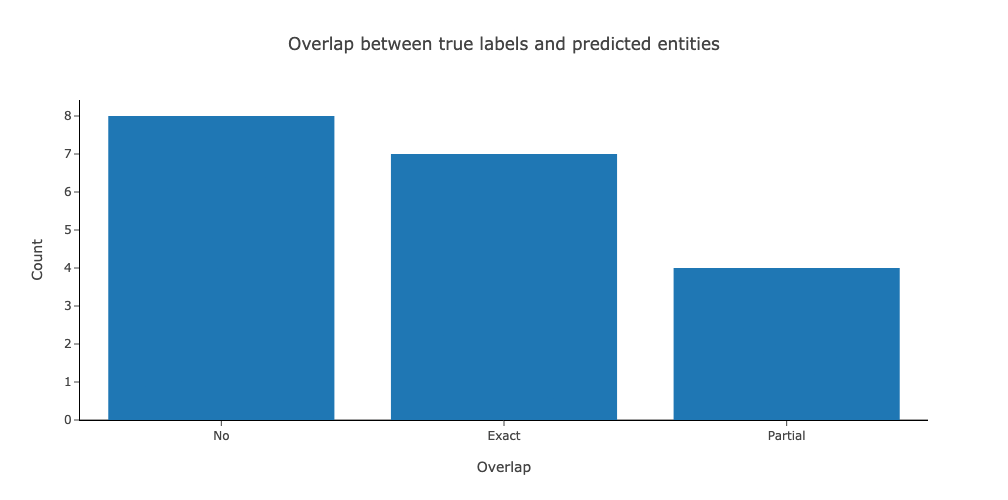

In [67]:
df = pd.DataFrame(manual_evaluation["Overlap"].value_counts())
df.reset_index(inplace = True)
fig_bar = px.bar(df, y = 'count', x= "Overlap",
                 title = "Overlap between true labels and predicted entities",
                 template = "none",
                 height = 500,
                 width=500,
                )
fig_bar.layout.xaxis.title = "Overlap"
fig_bar.layout.yaxis.title = "Count"
fig_bar.update_layout(xaxis=dict(dtick=1))
fig_bar.update_xaxes(
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white'
)
fig_bar.update_yaxes(
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white'
)
fig_bar.show()

In [55]:
df = manual_evaluation.groupby(by=["Gene Symbol", "Overlap"], as_index=False)["Disease Label ( Predicted )"].count()

,Gene Symbol,Overlap,Disease Label ( Predicted )
0,BPTF,No,2
1,BPTF,Partial,1
2,CAV3,Exact,1
3,CAV3,No,2
4,CRYAB,No,1
5,FH,Exact,1
6,FH,Partial,1
7,FHL1,No,3
8,FHL1,Partial,1
9,MSH2,Exact,2


In [61]:
df = manual_evaluation.groupby(by=["Gene Symbol", "Overlap"], as_index=False)["Disease Label ( Predicted )"].count()
df.sort_values(by=

,Gene Symbol,Overlap,Disease Label ( Predicted )
0,BPTF,No,2
1,BPTF,Partial,1
2,CAV3,Exact,1
3,CAV3,No,2
4,CRYAB,No,1
5,FH,Exact,1
6,FH,Partial,1
7,FHL1,No,3
8,FHL1,Partial,1
9,MSH2,Exact,2


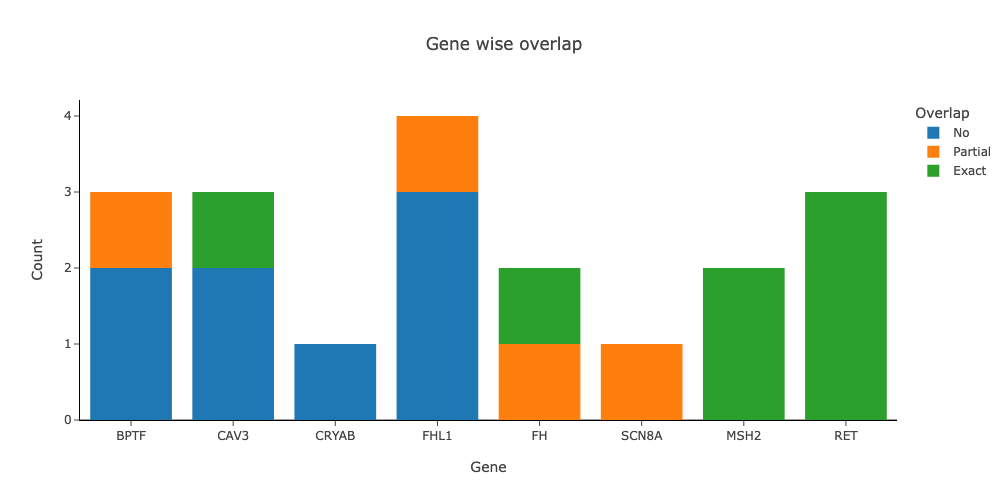

In [68]:
df = manual_evaluation.groupby(by=["Gene Symbol", "Overlap"], as_index=False)["Disease Label ( Predicted )"].count()
fig_bar = px.bar(df, x = "Gene Symbol", y= "Disease Label ( Predicted )",
                 title = "Gene wise overlap",
                 template = "none",
                 color="Overlap",
                # orientation='h',
                 height = 500,
                 width=500,
                )
fig_bar.layout.xaxis.title = "Gene"
fig_bar.layout.yaxis.title = "Count"
fig_bar.update_layout(yaxis=dict(dtick=1))
fig_bar.update_xaxes(
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white'
)
fig_bar.update_yaxes(
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='white'
)
fig_bar.show()

In [86]:
df = manual_evaluation[manual_evaluation["Overlap"]=="Exact"]
df.shape

(7, 6)